In [2]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [41]:
#Prapare data

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [4]:
classes = ['t-shirt', 'pants', 'sweater', 'dress', 'coat', 'shoes', 'shirt', 'sneakers', 'bag', 'boots']

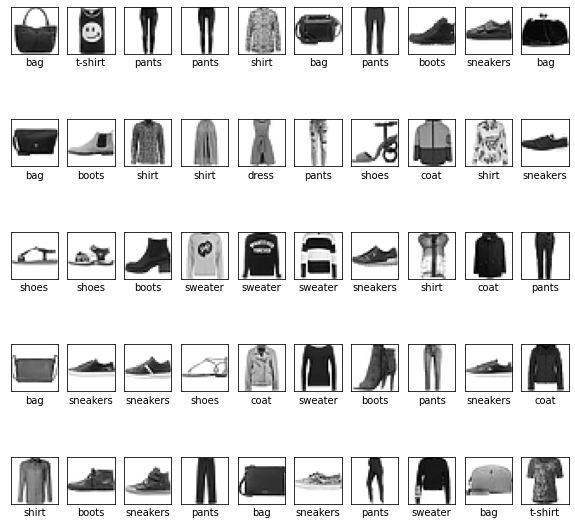

In [5]:
plt.figure(figsize=(10,10))
for i in range(100,150):
  plt.subplot(5,10,i-100+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(classes[y_train[i]])

In [49]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)


print(x_test.shape)
print(x_train.shape)

(10000, 784)
(60000, 784)


In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
n = 0

In [9]:
print(y_train[n])

9


In [10]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [11]:
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
#Neural network (shallow)

In [13]:
model =Sequential()
model.add(Dense(800, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
histiry = model.fit(x_train, y_train,
                    batch_size=200,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
240/240 [==============================] - 1s 2ms/step - loss: 0.2079 - accuracy: 0.9304 - val_loss: 0.3058 - val_accuracy: 0.8884
Epoch 2/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2069 - accuracy: 0.9314 - val_loss: 0.3082 - val_accuracy: 0.8899
Epoch 3/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.9308 - val_loss: 0.3107 - val_accuracy: 0.8888
Epoch 4/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9316 - val_loss: 0.3083 - val_accuracy: 0.8885
Epoch 5/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9317 - val_loss: 0.3074 - val_accuracy: 0.8897
Epoch 6/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9315 - val_loss: 0.3081 - val_accuracy: 0.8902
Epoch 7/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2054 - accuracy: 0.9310 - val_loss: 0.3067 - val_accuracy: 0.8898

Epoch 58/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1873 - accuracy: 0.9380 - val_loss: 0.3062 - val_accuracy: 0.8913
Epoch 59/100
240/240 [==============================] - 0s 2ms/step - loss: 0.1871 - accuracy: 0.9386 - val_loss: 0.3066 - val_accuracy: 0.8895
Epoch 60/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1867 - accuracy: 0.9382 - val_loss: 0.3076 - val_accuracy: 0.8898
Epoch 61/100
240/240 [==============================] - 0s 2ms/step - loss: 0.1861 - accuracy: 0.9389 - val_loss: 0.3025 - val_accuracy: 0.8909
Epoch 62/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1856 - accuracy: 0.9384 - val_loss: 0.3033 - val_accuracy: 0.8913
Epoch 63/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1853 - accuracy: 0.9384 - val_loss: 0.3044 - val_accuracy: 0.8887
Epoch 64/100
240/240 [==============================] - 1s 2ms/step - loss: 0.1852 - accuracy: 0.9389 - val_loss: 0.3077 - val_accuracy:

In [19]:
model.save('fashion_mnist_dense.h5')

In [20]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 0s 726us/step - loss: 0.3256 - accuracy: 0.8846


In [52]:
print(scores[1]*100)

88.45999836921692


In [21]:
n_rec = 496

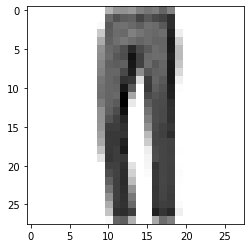

In [22]:
plt.imshow(x_test[n_rec].reshape(28,28), cmap=plt.cm.binary)
plt.show()

In [23]:
x = x_test[n_rec]
x = np.expand_dims(x, axis =0)

In [24]:
prediction = model.predict(x)

In [25]:
prediction

array([[1.60606924e-05, 9.99980211e-01, 8.43402518e-07, 2.37742142e-06,
        2.67761067e-07, 1.76419920e-11, 8.17472028e-08, 2.40979875e-10,
        1.04397444e-07, 2.20779749e-11]], dtype=float32)

In [26]:
prediction = np.argmax(prediction[0])
print('class number:', prediction)
print('class name:', classes[prediction])

class number: 1
class name: pants


In [34]:
n_rec+=1

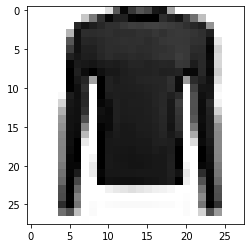

In [36]:
plt.imshow(x_test[n_rec].reshape(28,28), cmap=plt.cm.binary)
plt.show()

In [40]:
predict = np.argmax(model.predict(np.expand_dims(x_test[n_rec], axis =0))[0])
print('class number:', predict)
print('class name:', classes[predict])

class number: 2
class name: sweater


In [31]:
#Neural network №2 (deeper) 

In [89]:
model = Sequential()
model.add(Dense(400, input_dim=784, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [90]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_37 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_38 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_39 (Dense)             (None, 10)                2010      
Total params: 436,410
Trainable params: 436,410
Non-trainable params: 0
_________________________________________________________________
None


In [91]:
histiry = model.fteit(x_train, y_train,
                    batch_size=200,
                    epochs=100,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100
240/240 [==============================] - 1s 2ms/step - loss: 1.4427 - accuracy: 0.5736 - val_loss: 0.8871 - val_accuracy: 0.7023
Epoch 2/100
240/240 [==============================] - 0s 2ms/step - loss: 0.7687 - accuracy: 0.7401 - val_loss: 0.6751 - val_accuracy: 0.7778
Epoch 3/100
240/240 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.7928 - val_loss: 0.5927 - val_accuracy: 0.8052
Epoch 4/100
240/240 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.8116 - val_loss: 0.5434 - val_accuracy: 0.8171
Epoch 5/100
240/240 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.8228 - val_loss: 0.5135 - val_accuracy: 0.8263
Epoch 6/100
240/240 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.8303 - val_loss: 0.5108 - val_accuracy: 0.8220
Epoch 7/100
240/240 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.8339 - val_loss: 0.4821 - val_accuracy: 0.8299

Epoch 58/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2913 - accuracy: 0.8966 - val_loss: 0.3414 - val_accuracy: 0.8788
Epoch 59/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.8976 - val_loss: 0.3412 - val_accuracy: 0.8795
Epoch 60/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2873 - accuracy: 0.8978 - val_loss: 0.3489 - val_accuracy: 0.8768
Epoch 61/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2860 - accuracy: 0.8986 - val_loss: 0.3347 - val_accuracy: 0.8818
Epoch 62/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.8983 - val_loss: 0.3410 - val_accuracy: 0.8774
Epoch 63/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2828 - accuracy: 0.8990 - val_loss: 0.3381 - val_accuracy: 0.8813
Epoch 64/100
240/240 [==============================] - 0s 2ms/step - loss: 0.2803 - accuracy: 0.9005 - val_loss: 0.3327 - val_accuracy:

In [92]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 0s 667us/step - loss: 0.3412 - accuracy: 0.8805


In [93]:
print(scores[1]*100)

88.05000185966492
